In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-tumor-mri-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1608934%2F2645886%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240923%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240923T152951Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D16421684f9e7362452f422f582c3e89902cdb8ac706e273e006fdbe7fb9b1bea02789ae6cd6bd8f6b28e0535b5595c16446f0fc88580a4334d08704ab5489b1ac64752bd8fbb78444389f80f15ceb75760e5fab735590a130ff24061dc8a611ed31d86cd92b4e341cdd62cada1fb4bb271a2f292730bb2199ef446c2cd8ef93a3de8fe680c65e4954e80ec9bf97967a7214b2d9b9859db6b78a2443cfff7e5050013c29ba3f3193addf080026684414acce4cec1785dba506baed5fa0c69c373bc4e327e0e042c9df6cbd29603352fe006df5176164b7402d0d53c71242960981dfaa038d2a4dc378d8adbbeaf637e911f97c134d6c392517bee081106ba377a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 155791278 bytes downloaded
Downloaded and uncompressed: brain-tumor-mri-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"


Streaming output truncated to the last 5000 lines.
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_1172.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0356.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0502.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0221.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0850.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0797.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0159.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0517.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0770.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_1063.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0297.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0999.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0635.jpg


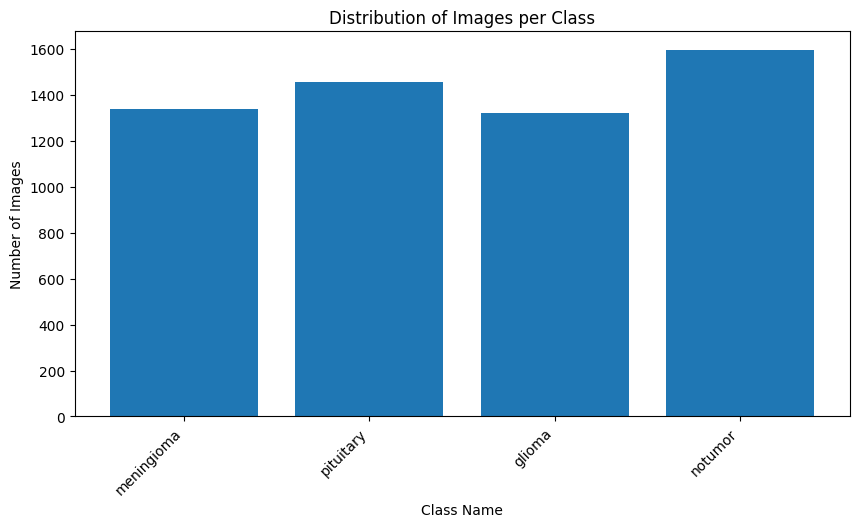

In [ ]:
import os
import matplotlib.pyplot as plt

data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'  # Replace with the actual directory containing your data

class_counts = {}
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# Plotting the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


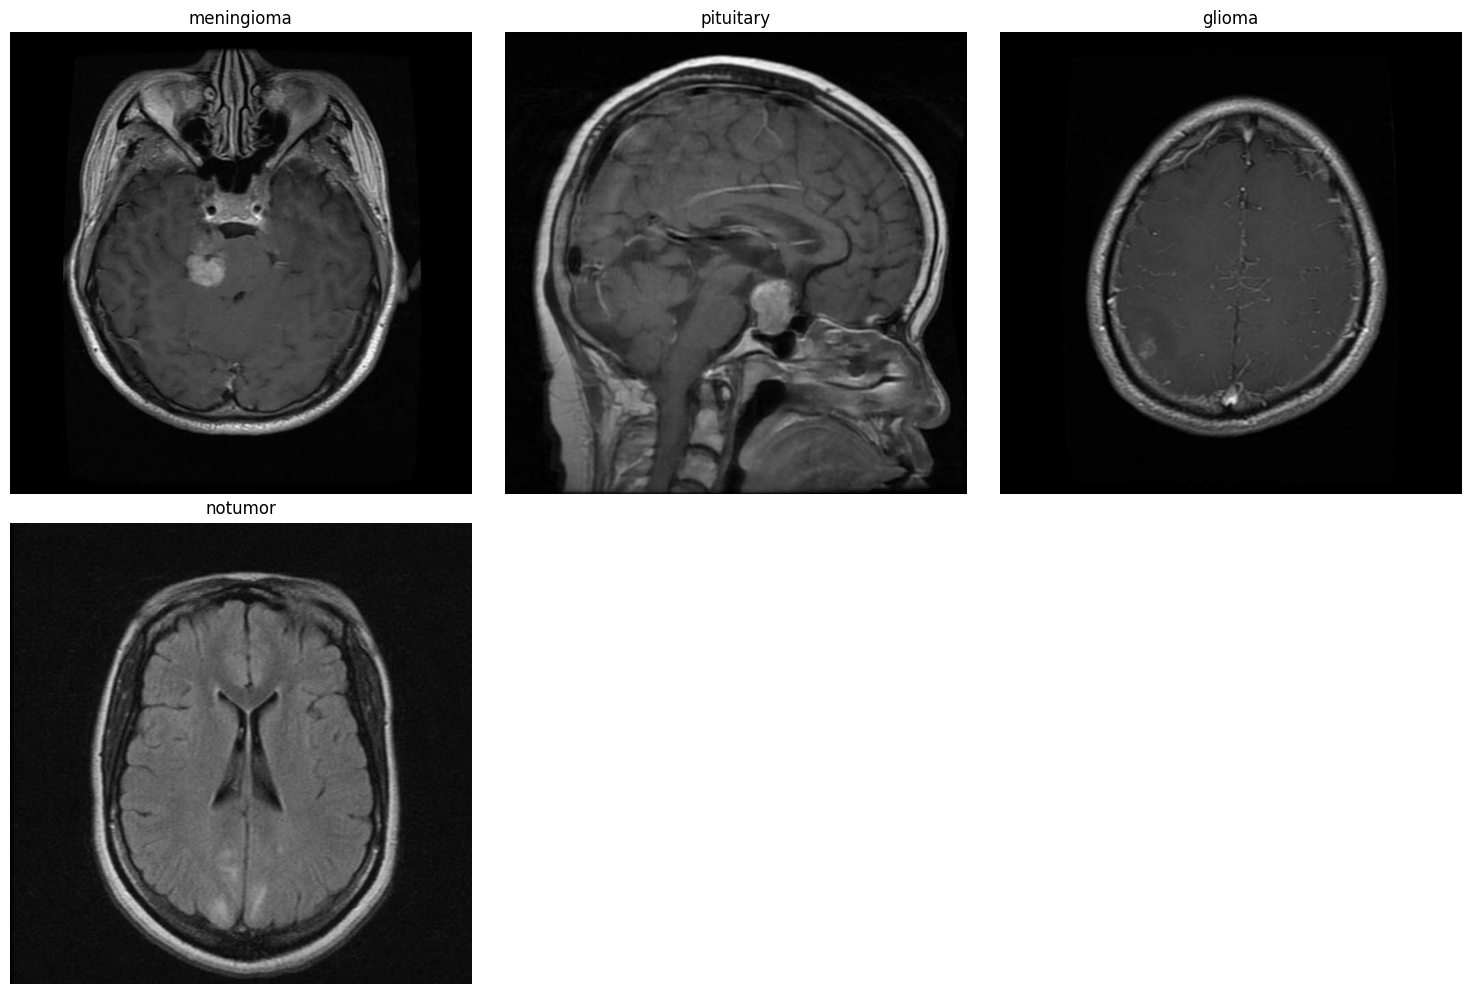

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'

# Create a dictionary to store a sample image for each class
class_images = {}

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                image = cv2.imread(image_path)
                if image is not None:
                    class_images[class_name] = image
                    break  # Only take one sample image per class
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")


# Visualize the sample images
plt.figure(figsize=(15, 10))
for i, (class_name, image) in enumerate(class_images.items()):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image, ImageEnhance

In [ ]:
#Load Training Data
train_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training/'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

#Concatenate data paths
Fseries = pd.Series(filepaths, name = 'filepaths')
Lseries = pd.Series(labels, name = 'labels')

train_df = pd.concat([Fseries, Lseries], axis = 1)

In [ ]:
#Load Testing Data
train_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing/'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

#Concatenate data paths
Fseries = pd.Series(filepaths, name = 'filepaths')
Lseries = pd.Series(labels, name ='labels')

ts_df = pd.concat([Fseries, Lseries], axis = 1)

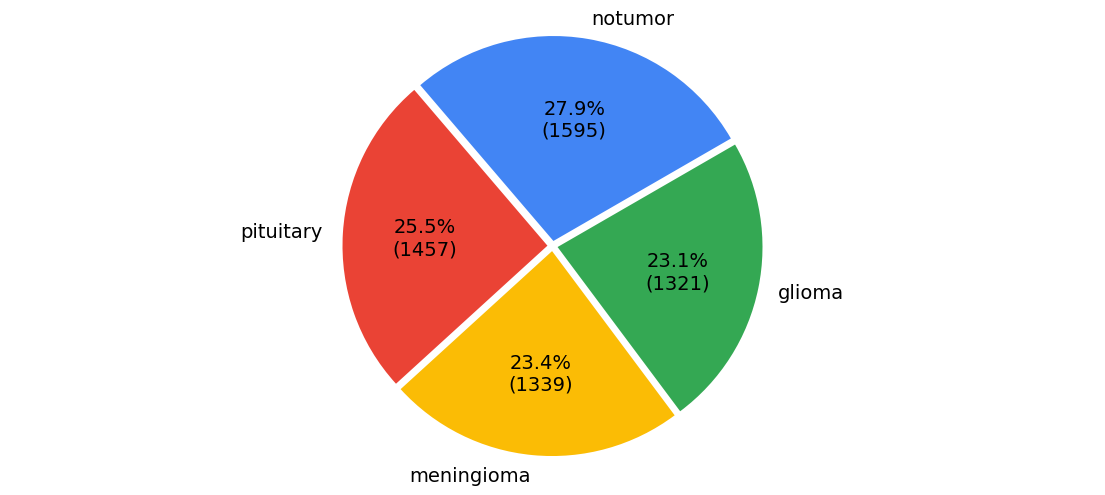

In [ ]:
#Graph Dataset Split
plt.figure(figsize = (14, 6))
plt.rcParams.update({'font.size': 14})
data_balance = train_df.labels.value_counts()

def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct * total / 100.0))
    return "{:.1f}%\n({:d})".format(pct, val)

plt.pie(data_balance,
        labels = data_balance.index,
        autopct = custom_autopct,
        colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853'],
        explode = (0.025, 0.025, 0.025, 0.025),
        startangle = 30);
plt.axis('equal')
plt.show()

In [ ]:
#Split dataset
valid_df, test_df = train_test_split(ts_df, train_size = 0.5, shuffle = True, random_state = 42)

In [ ]:
#Augment and Preprocess Scans
batch_size = 32
img_size = (240, 240)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df, x_col = 'filepaths', y_col = 'labels', target_size = img_size, class_mode = 'categorical',
                                    color_mode = 'rgb', shuffle = True, batch_size = batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col = 'filepaths', y_col = 'labels', target_size = img_size, class_mode = 'categorical',
                                    color_mode = 'rgb', shuffle = True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df, x_col = 'filepaths', y_col = 'labels', target_size = img_size, class_mode = 'categorical',
                                    color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


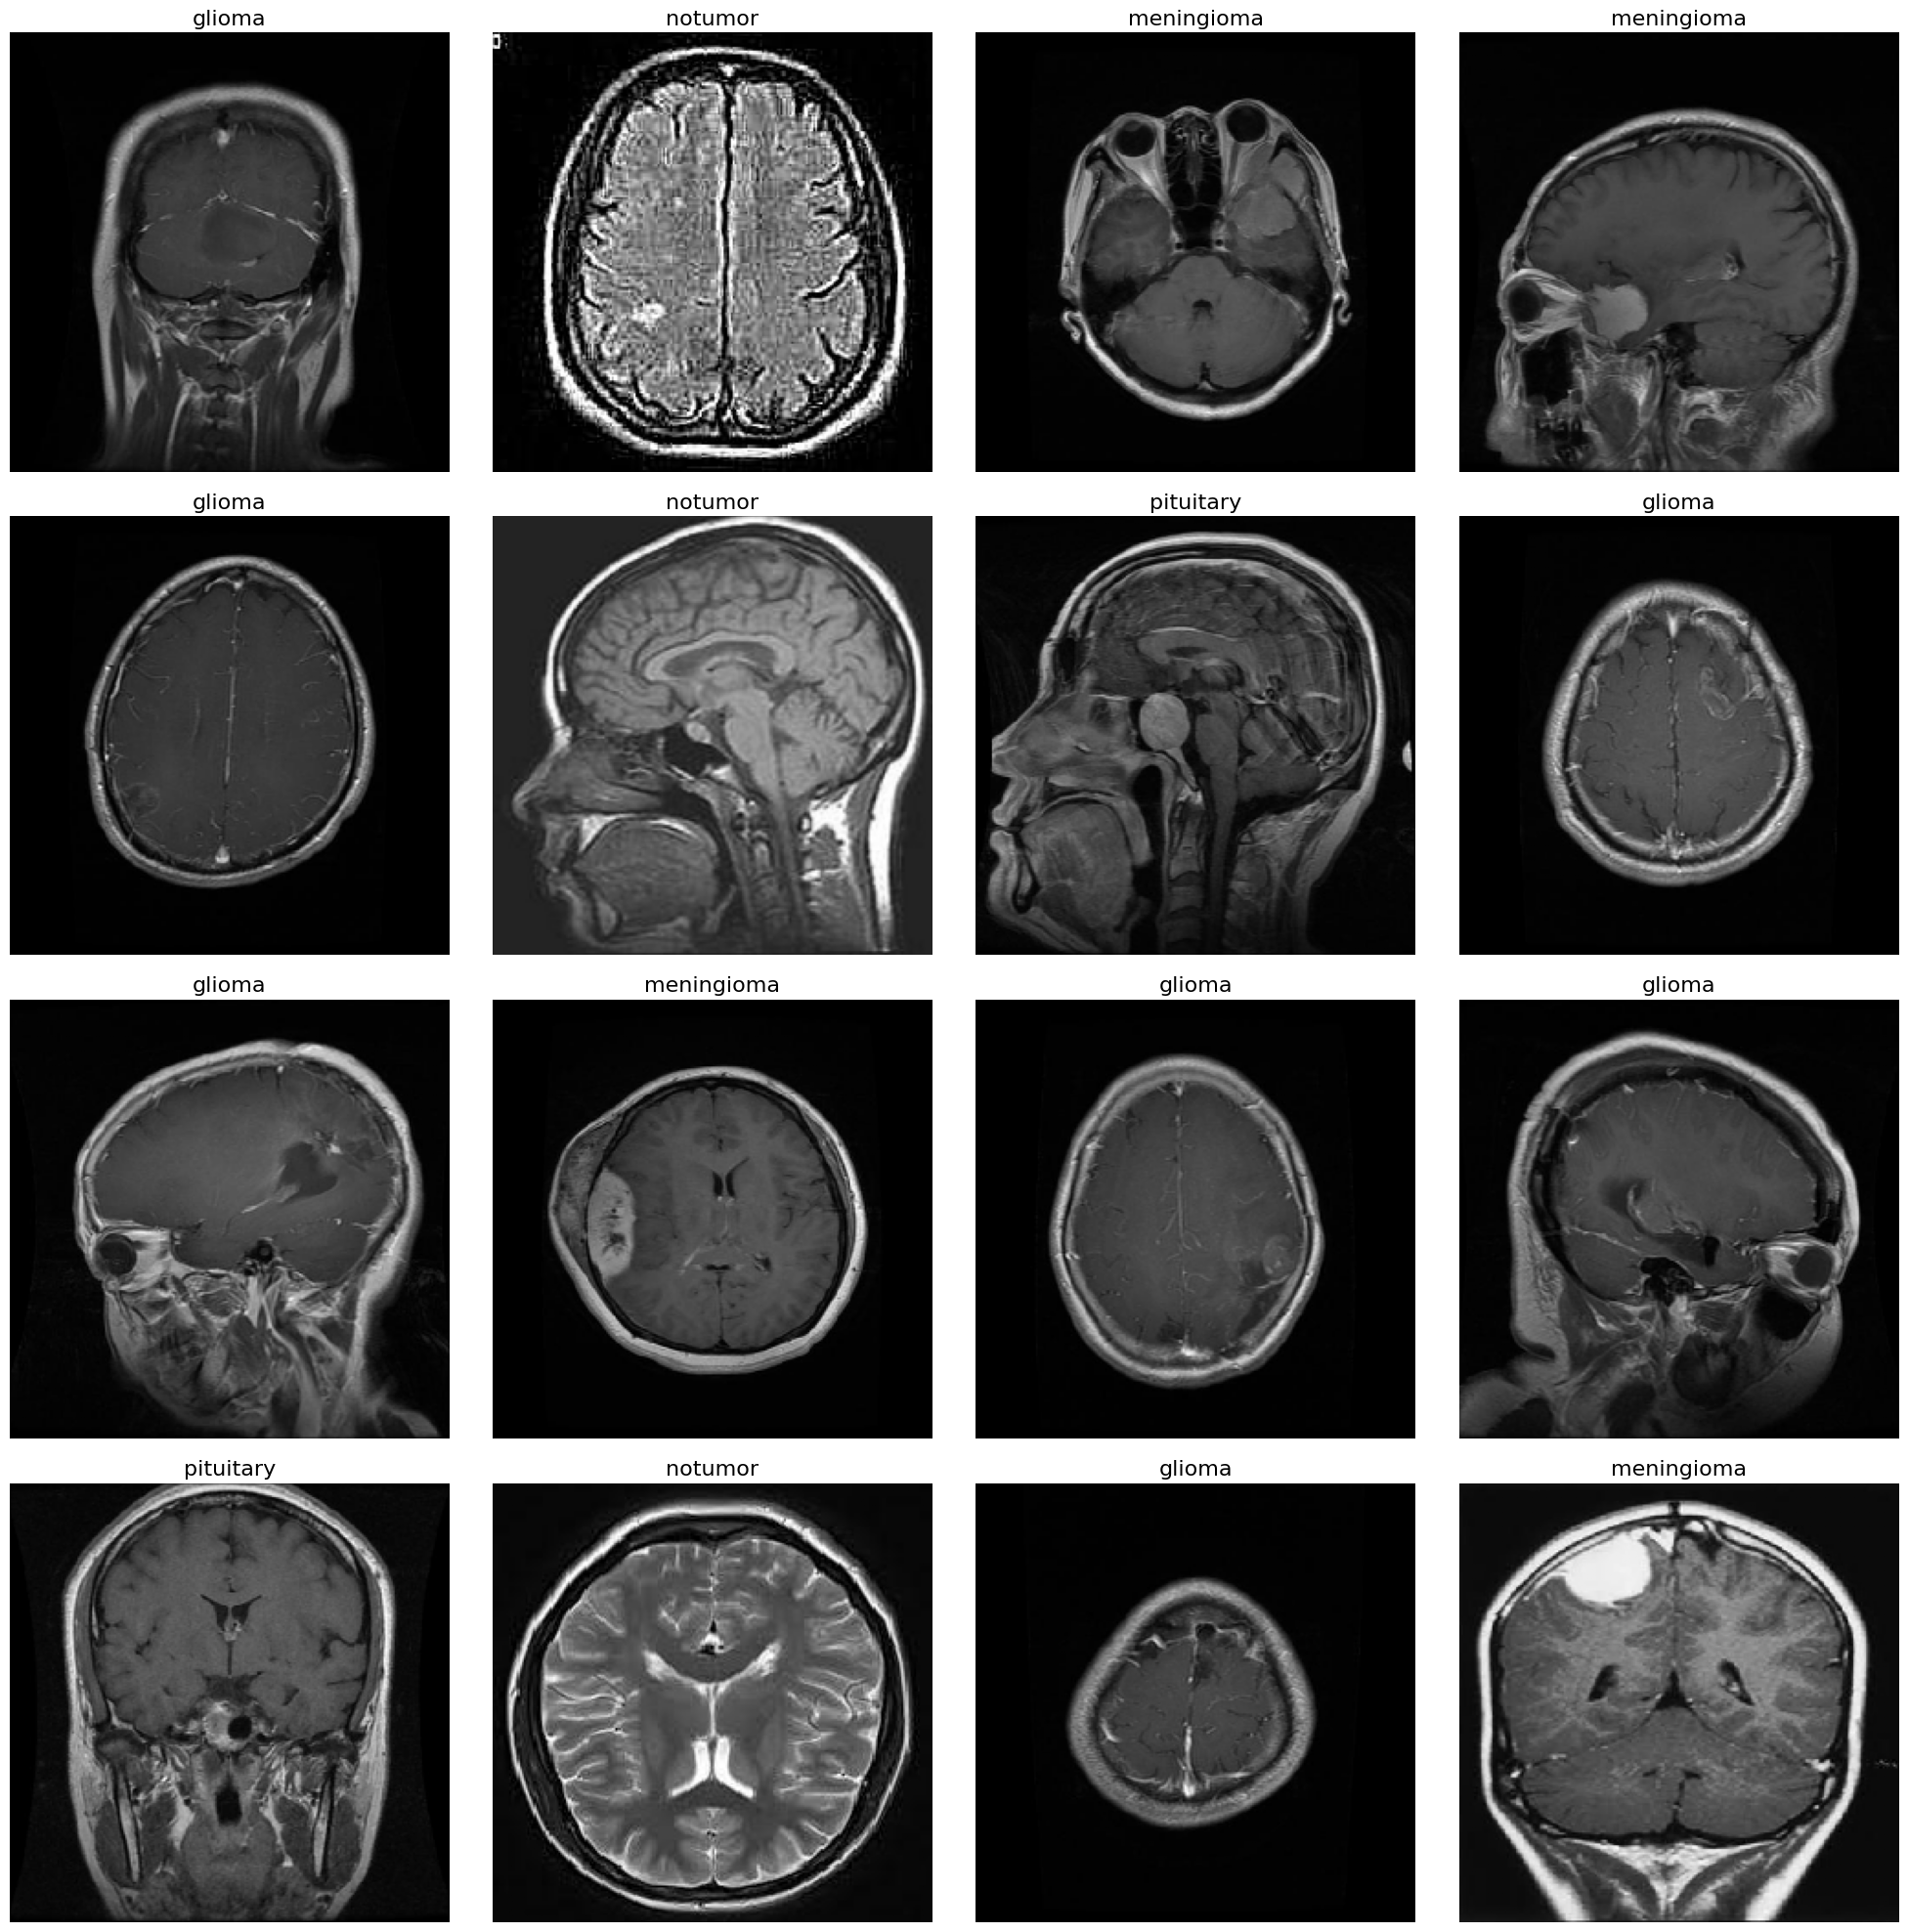

In [ ]:
#Plot Processed Scans
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize = (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color = 'black', fontsize = 16)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Set image size and number of classes
img_size = 240
class_count = len(train_gen.class_indices.keys())

# Build the VGG19-like model from scratch
model = Sequential()

# Input layer
model.add(Input(shape=(img_size, img_size, 3)))

# Block 1: 2 Conv layers + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2: 2 Conv layers + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3: 4 Conv layers + MaxPooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4: 4 Conv layers + MaxPooling
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5: 4 Conv layers + MaxPooling
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten and fully connected layers (Dense)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer (Softmax for multi-class classification)
model.add(Dense(class_count, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,586,628 (532.48 MB)

 Trainable params: 139,586,628 (532.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install torchviz

import torch
from torch import nn
from torchviz import make_dot # Now this line should work correctly.

# Convert Keras model to PyTorch model (if needed)
# Assuming you have your Keras model named 'model'
pytorch_model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    # ... Continue converting other layers similarly ...
)


# Example of visualization with a random input tensor
x = torch.randn(1, 3, img_size, img_size)  # Adjust channel, height, width as needed
y = pytorch_model(x)
dot = make_dot(y, params=dict(pytorch_model.named_parameters()))
dot.render("model_visualization", format="png")  # Save the visualization as a PNG file

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=b2ad412c4a26090409ac63ee8cb0ac976ab4437d34f1981faba681d7f6d93beb
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


'model_visualization.png'

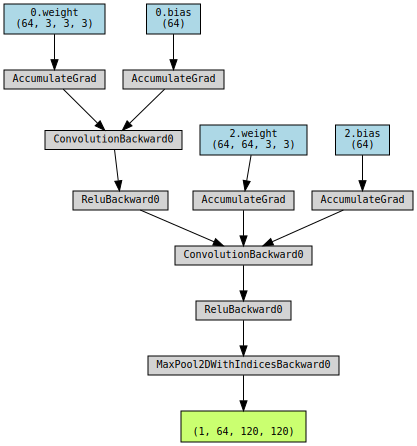

In [ ]:
dot

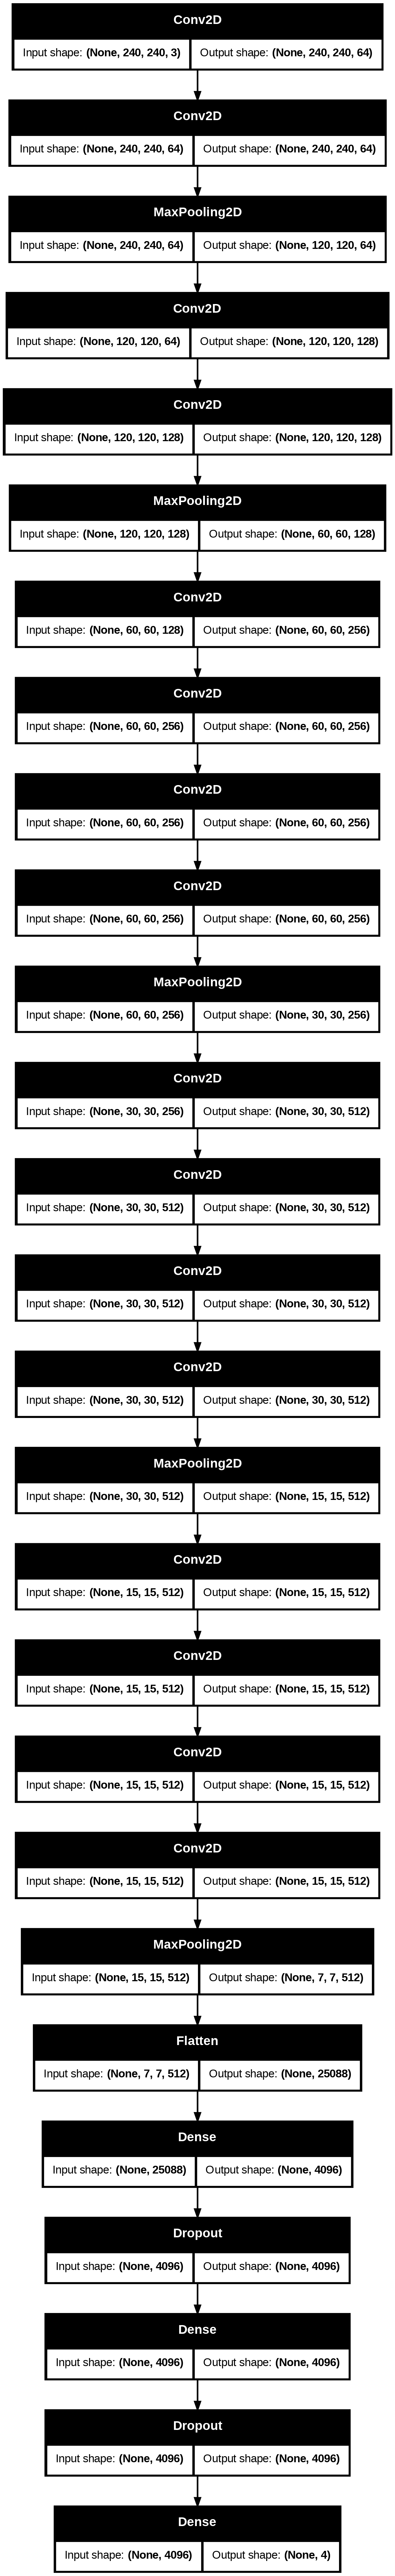

In [ ]:
keras.utils.plot_model(model, show_shapes = True)


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

batch_size = 32
epochs = 20
history = model.fit(train_gen,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = valid_gen,
                    shuffle = False)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.4473 - loss: 1.1723 - val_accuracy: 0.7252 - val_loss: 0.6781
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 129s 718ms/step - accuracy: 0.7954 - loss: 0.5566 - val_accuracy: 0.7588 - val_loss: 0.6381
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 127s 709ms/step - accuracy: 0.8504 - loss: 0.4067 - val_accuracy: 0.7939 - val_loss: 0.5433
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 128s 716ms/step - accuracy: 0.8816 - loss: 0.3021 - val_accuracy: 0.8550 - val_loss: 0.3408
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 711ms/step - accuracy: 0.9182 - loss: 0.2277 - val_accuracy: 0.8901 - val_loss: 0.3145
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 712ms/step - accuracy: 0.9446 - loss: 0.1691 - val_accuracy: 0.9191 - val_loss: 0.2104
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 127s 709ms/step - accuracy: 0.9500 - loss: 0.1452 - val_accuracy: 0.9038 - val_loss: 0.2397
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 128s 716ms/step - accuracy: 0.9597 - loss: 0.1177 

In [ ]:
# prompt: run another 10 epchs

epochs = 10
history = model.fit(train_gen,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = valid_gen,
                    shuffle = False)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 127s 706ms/step - accuracy: 0.9902 - loss: 0.0328 - val_accuracy: 0.9573 - val_loss: 0.1671
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 700ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9496 - val_loss: 0.2405
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 711ms/step - accuracy: 0.9888 - loss: 0.0361 - val_accuracy: 0.9557 - val_loss: 0.2478
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 700ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accuracy: 0.9725 - val_loss: 0.0965
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 699ms/step - accuracy: 0.9981 - loss: 0.0079 - val_accuracy: 0.9664 - val_loss: 0.1403
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 698ms/step - accuracy: 0.9943 - loss: 0.0159 - val_accuracy: 0.9573 - val_loss: 0.1480
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 700ms/step - accuracy: 0.9949 - loss: 0.0132 - val_accuracy: 0.9542 - val_loss: 0.1726
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 699ms/step - accuracy: 0.9838 -

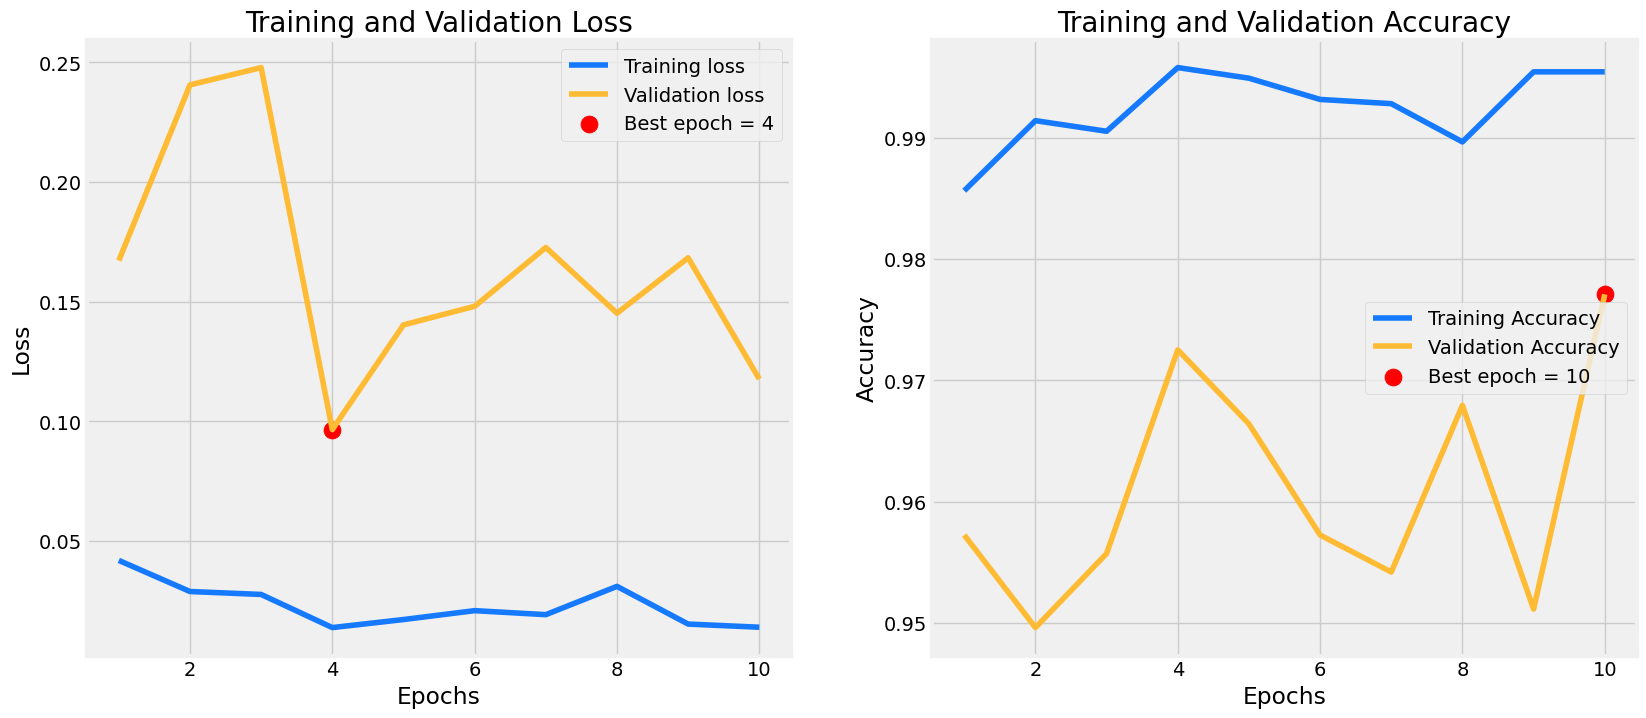

In [ ]:
#Graph results
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

plt.figure(figsize = (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, color = '#157AFF', label = 'Training loss')
plt.plot(Epochs, val_loss, color = '#FFBB33', label = 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s = 150, color = 'red', label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, color = '#157AFF', label = 'Training Accuracy')
plt.plot(Epochs, val_acc, color = '#FFBB33', label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s = 150, color = 'red', label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: download model to google drive

model.save('/content/drive/MyDrive/brain_tumor_model.h5')


In [ ]:
#Results for training, validating, testing
train_score = model.evaluate(train_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(test_gen, verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 250ms/step - accuracy: 1.0000 - loss: 2.9898e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.9771 - loss: 0.1174


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.9689 - loss: 0.1855
Train Loss:  0.0003019408031832427
Train Accuracy:  1.0
--------------------
Validation Loss:  0.11764633655548096
Validation Accuracy:  0.9770992398262024
--------------------
Test Loss:  0.18283021450042725
Test Accuracy:  0.9695122241973877


In [ ]:
# prompt: classfication score f1 score

import numpy as np
from sklearn.metrics import f1_score

# Get predictions for the test set
y_pred = model.predict(test_gen)
y_true = test_gen.classes

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("F1 Score:", f1)

# You can also calculate per-class F1 scores if needed
# f1_per_class = f1_score(y_true, y_pred_classes, average=None)
# print("F1 Score per Class:", f1_per_class)

# You can also print a classification report with precision, recall, F1-score, and support
# print(classification_report(y_true, y_pred_classes))


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step
F1 Score: 0.9692869031157502


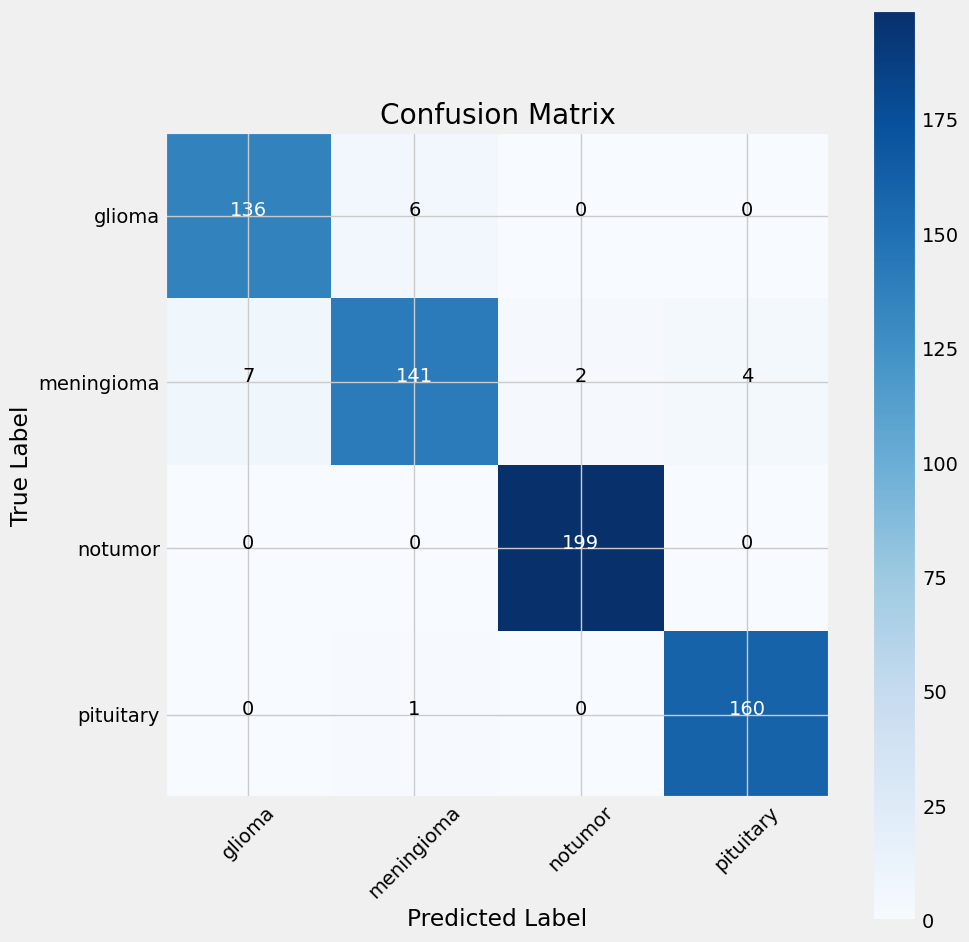

In [ ]:
#Confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(test_gen.classes, y_pred_classes) # Use predicted class labels instead of probabilities

plt.figure(figsize = (10, 10))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred_classes, target_names = classes)) # Use predicted class labels instead of probabilities

              precision    recall  f1-score   support

      glioma       0.95      0.96      0.95       142
  meningioma       0.95      0.92      0.93       154
     notumor       0.99      1.00      0.99       199
   pituitary       0.98      0.99      0.98       161

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
!cp modelv16.h5 /content/drive/MyDrive/